<a href="https://colab.research.google.com/github/arnelGalit/Big_Data_Analytics/blob/main/Galit_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis
### Galit, Arnel M.
### BSCpE 3-3
### Big Data Analytics


### Checking of Data

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the titanic dataset

In [ ]:
 df = sns.load_dataset('titanic')

Checking the contents of the dataset

In [ ]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.shape

(891, 15)

Handle missing data

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)  # Impute age with median
df.drop('deck', axis=1, inplace=True)  # Drop deck (high missingness)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Fill Embarked mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)  # Fill Embarked mode

<ipython-input-83-5e12fdf95dad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)  # Impute age with median
<ipython-input-83-5e12fdf95dad>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df['family_size'] = df['sibsp'] + df['parch'] + 1 # Create FamilySize feature

In [ ]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,Did not survive,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,Survived,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,Survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,Survived,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,Did not survive,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,Did not survive,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0
6,Did not survive,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,0
7,Did not survive,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,4
8,Survived,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,2
9,Survived,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,1


### Visualization and Data Analysis

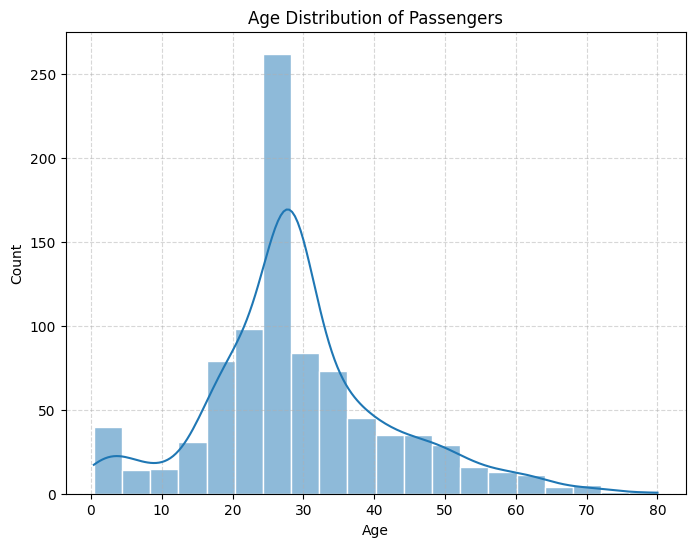

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, edgecolor='white')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
print(df['sex'].value_counts(normalize=True))
print(df['pclass'].value_counts(normalize=True))

sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


<ipython-input-20-a933cfa6c9ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


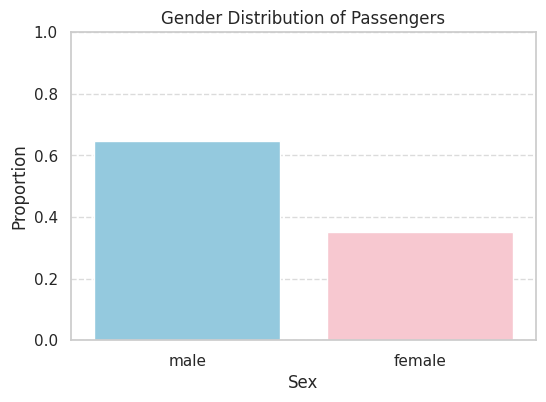

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.barplot(
    x=df['sex'].value_counts(normalize=True).index,
    y=df['sex'].value_counts(normalize=True).values,
    palette={'male': 'skyblue', 'female': 'pink'}
)
plt.title('Gender Distribution of Passengers')
plt.ylabel('Proportion')
plt.xlabel('Sex')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-33-69db2e8600c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


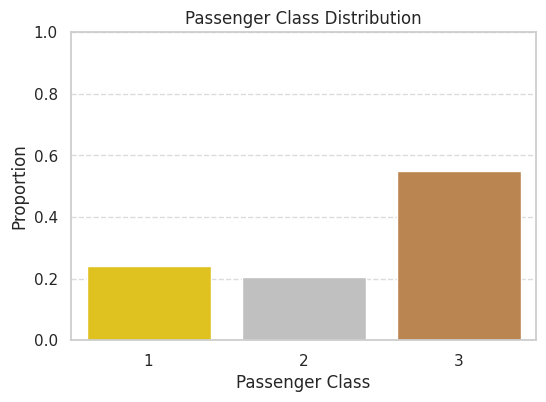

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(
    x=['1', '2', '3'],
    y=df['pclass'].value_counts(normalize=True).reindex([1, 2, 3]).values,
    palette={ '1': 'gold', '2': 'silver', '3': 'peru' }
)
plt.title('Passenger Class Distribution')
plt.ylabel('Proportion')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-24-9ce2dc7d1482>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None, palette={'male': 'skyblue', 'female': 'pink'})
<ipython-input-24-9ce2dc7d1482>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None, palette={'male': 'skyblue', 'female': 'pink'})


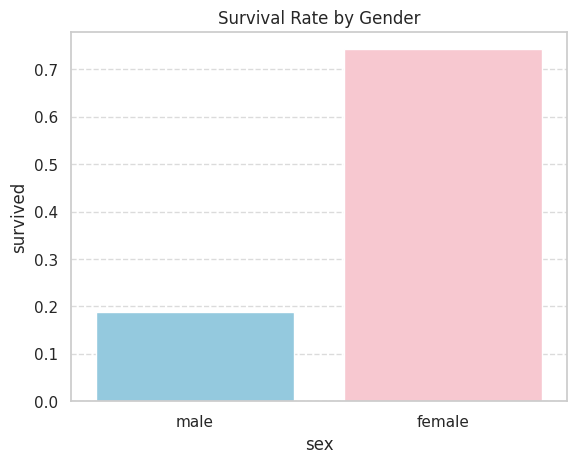

In [ ]:
sns.barplot(x='sex', y='survived', data=df, ci=None, palette={'male': 'skyblue', 'female': 'pink'})
plt.title('Survival Rate by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-85-ff09b9247988>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


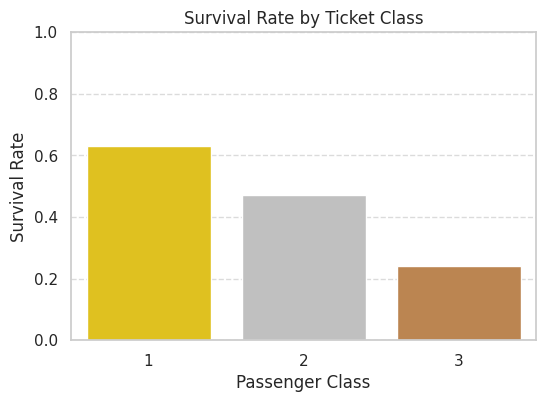

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(
    x=['1', '2', '3'],
    y=df.groupby('pclass')['survived'].mean().reindex([1, 2, 3]).values,
    palette={ '1': 'gold', '2': 'silver', '3': 'peru' }
)
plt.title('Survival Rate by Ticket Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-86-c066979851d4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='who', y='survived', data=df, ci=None, palette={'Adult': 'skyblue', 'Child': 'lightgreen'})
<ipython-input-86-c066979851d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='who', y='survived', data=df, ci=None, palette={'Adult': 'skyblue', 'Child': 'lightgreen'})


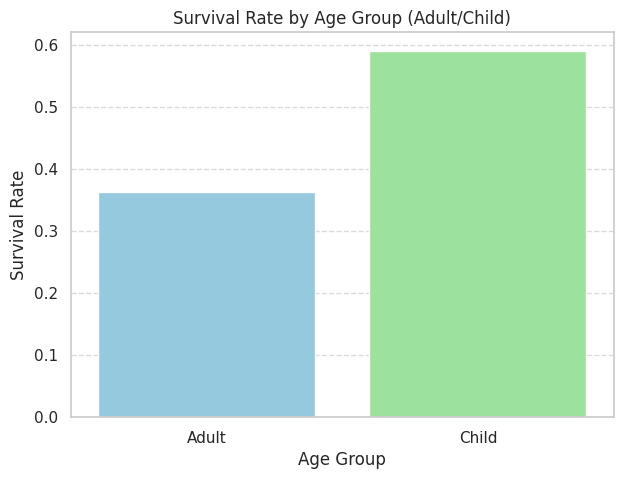

In [ ]:
df['who'] = 'Adult'
df.loc[df['age'] < 16, 'who'] = 'Child'
plt.figure(figsize=(7, 5))
sns.barplot(x='who', y='survived', data=df, ci=None, palette={'Adult': 'skyblue', 'Child': 'lightgreen'})
plt.title('Survival Rate by Age Group (Adult/Child)')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-87-9f6d74284ded>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=df, palette="Set2")


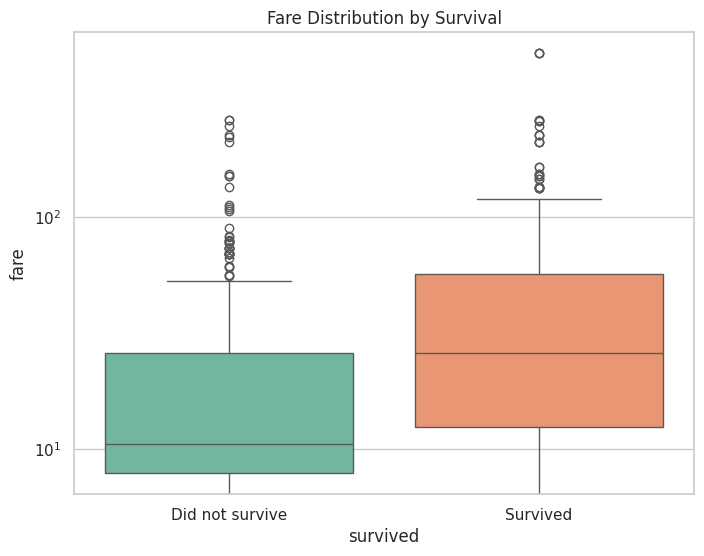

In [ ]:
df['survived'] = df['survived'].map({0: 'Did not survive', 1: 'Survived'})
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=df, palette="Set2")
plt.yscale('log')
plt.title('Fare Distribution by Survival')
plt.show()

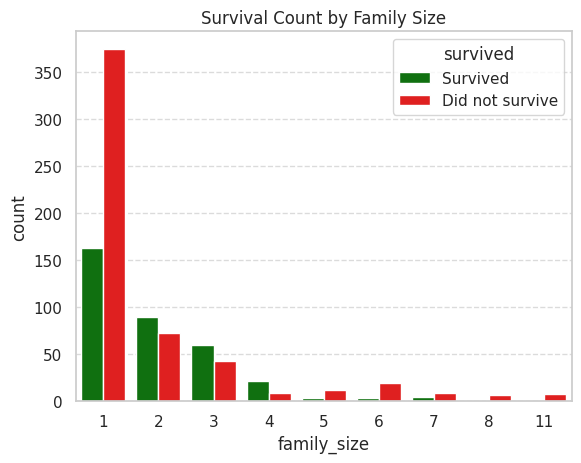

In [ ]:
sns.countplot(x='family_size', hue='survived', data=df, palette={'Survived': 'green', 'Did not survive': 'red'})
plt.title('Survival Count by Family Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from scipy import stats
contingency_table = pd.crosstab(df['survived'], df['sex'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test result for Survived vs Sex: p-value = {p}")


contingency_table_pclass = pd.crosstab(df['survived'], df['pclass'])
chi2_pclass, p_pclass, dof, expected_pclass = stats.chi2_contingency(contingency_table_pclass)

print(f"Chi-square test result for Survived vs Pclass: p-value = {p_pclass}")

Chi-square test result for Survived vs Sex: p-value = 1.1973570627755645e-58
Chi-square test result for Survived vs Pclass: p-value = 4.549251711298793e-23
